### **Load the Required Libraries**

In [1]:
import pandas as pd
import statistics as stat
import matplotlib.pyplot as plt
import matplotlib.pylab as lab

### **Load the DataSet** 

In [2]:
data = pd.read_csv('behavioral_risk_factor_dataset.csv')

### **Convert the Question feature to Human Readable Format**
### **Remove the Unnecessary dimensions**

In [3]:
# Convert question to a category and rename categories for visibility
data["Question"] = data["Question"].astype("category")
data['Question'].cat.categories = ["% Overweight Adults",
                                   "% Obese Adults",
                                   "% Mod Aerobic", 
                                   "% Mod Aerobic & Strength", 
                                   "% Vigerous Aerobic", 
                                   "% Strength", 
                                   "% No Phys. Activity", 
                                   "% < 1 Fruit / Day", 
                                   "% < 1 Veg / Day"]

# Drop, unnecessary columns to make table human-readable
cols_to_drop = ['Datasource', 'Class', 'Topic', 'Data_Value_Unit', 
                'Data_Value_Type', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 
                'Data_Value_Footnote', 'Total', 'Age(years)', 'Education',
                'Gender', 'Income', 'Race/Ethnicity', 'ClassID', 
                'TopicID', 'QuestionID', 'DataValueTypeID', 'LocationID']
data.drop(cols_to_drop, axis = 1, inplace = True)

### **Preview of the Dataset**

In [4]:
data.head(n=5)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,GeoLocation,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,% Obese Adults,32.0,30.5,33.5,7304.0,"(32.84057112200048, -86.63186076199969)",Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,% Obese Adults,32.3,29.9,34.7,2581.0,"(32.84057112200048, -86.63186076199969)",Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,% Obese Adults,31.8,30.0,33.6,4723.0,"(32.84057112200048, -86.63186076199969)",Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,% Obese Adults,33.6,29.9,37.6,1153.0,"(32.84057112200048, -86.63186076199969)",Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,% Obese Adults,32.8,30.2,35.6,2402.0,"(32.84057112200048, -86.63186076199969)",Education,High school graduate,EDU,EDUHSGRAD


### ** Obtaining the records containing Data_Values regarding % of Obese Adults**

In [5]:
Obese_adults_data = data.loc[data['Question'] == '% Obese Adults']
State_wise_Obese_adults_data = Obese_adults_data.loc[Obese_adults_data['LocationDesc'] != 'National']
Total_State_wise_Obese_Adults = State_wise_Obese_adults_data.loc[State_wise_Obese_adults_data['StratificationCategory1'] == 'Total']

### ** Obtaining the records containing Data_Values regarding % of Fruit Consumption < 1 per Day**

In [6]:
Fruit_data = data.loc[data['Question'] == '% < 1 Fruit / Day']
State_wise_Fruit_data = Fruit_data.loc[Fruit_data['LocationDesc'] != 'National']
Total_State_wise_Fruit_data = State_wise_Fruit_data.loc[State_wise_Fruit_data['StratificationCategory1'] == 'Total']

### ** Obtaining the records containing Data_Values regarding % of people involved in Vigerous Aerobic**

In [7]:
Vigerous_Aerobic_data = data.loc[data['Question'] == '% Vigerous Aerobic']
state_wise_Vigerous = Vigerous_Aerobic_data.loc[Vigerous_Aerobic_data['LocationDesc'] != 'National']
Total_State_wise_Vigerous = state_wise_Vigerous.loc[state_wise_Vigerous['StratificationCategory1'] == 'Total']

### **Finding the average % of Obese Adults per State**

In [8]:
Obese_adults_dictionary = {}
states_list = set(Total_State_wise_Obese_Adults['LocationAbbr'].tolist())
for each in states_list:
    Obese_adults_dictionary[each] = []
    
for index, row in Total_State_wise_Obese_Adults.iterrows():
    Obese_adults_dictionary[row['LocationAbbr']].append(row['Data_Value'])
    
avg_obese_adults = {}
for each in Obese_adults_dictionary.keys():
    avg_obese_adults[each] = stat.mean(Obese_adults_dictionary[each])

### **Finding the average % of People consuming less than 1 fruit per day**

In [9]:
Fruits_consumption_dict = {}
for each in states_list:
    Fruits_consumption_dict[each] = []

for index, row in Total_State_wise_Fruit_data.iterrows():
    Fruits_consumption_dict[row['LocationAbbr']].append(row['Data_Value'])
    
for each in Fruits_consumption_dict.keys():
    if not Fruits_consumption_dict[each]:
        Fruits_consumption_dict[each].append(0)
 
avg_fruit_consumption = {}  
for each in Fruits_consumption_dict.keys():
    avg_fruit_consumption[each] = stat.mean(Fruits_consumption_dict[each])

### **Finding the average % of People performing Vigerous Aerobic Activity**

In [10]:
Vigerous_Aerobic_dict = {}
for each in states_list:
    Vigerous_Aerobic_dict[each] = []
    
for index, row in Total_State_wise_Vigerous.iterrows():
    Vigerous_Aerobic_dict[row['LocationAbbr']].append(row['Data_Value'])
    
for each in Vigerous_Aerobic_dict.keys():
    if not Vigerous_Aerobic_dict[each]:
        Vigerous_Aerobic_dict[each].append(0)
        
avg_Vigerous_activity = {}
for each in Vigerous_Aerobic_dict.keys():
    avg_Vigerous_activity[each] = stat.mean(Vigerous_Aerobic_dict[each])

### **Plotting the Values** 
### **X-Coordinates = Avg Obesity**
### **Y-Coordinates = Avg of people consuming less than 1 Fruit per Day**

In [11]:
Fruits_Obesity_relation = []
for each in avg_obese_adults.keys():
    if avg_obese_adults[each] == 0 or avg_fruit_consumption[each] == 0:
        continue
    else:
        Fruits_Obesity_relation.append((avg_obese_adults[each], avg_fruit_consumption[each]))

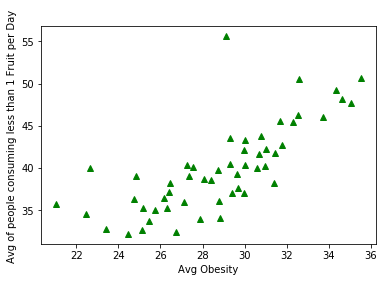

In [12]:
for each in Fruits_Obesity_relation:
    plt.plot([each[0]], [each[1]], 'g^')
plt.xlabel('Avg Obesity')
plt.ylabel('Avg of people consuming less than 1 Fruit per Day ')
plt.show()

### **X-Coordinates = Avg Obesity**
### **Y-Coordinates = Avg of % of people performing Vigerous Aerobic Activity**

In [13]:
VigerousAerboic_Obesity_relation = []
for each in avg_Vigerous_activity.keys():
    if avg_Vigerous_activity[each] == 0 or avg_Vigerous_activity[each] == 0:
        continue
    else:
        VigerousAerboic_Obesity_relation.append((avg_obese_adults[each], avg_Vigerous_activity[each]))

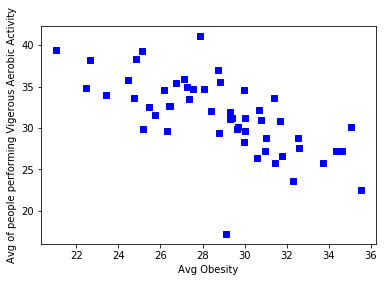

In [14]:
for each in VigerousAerboic_Obesity_relation:
    plt.plot([each[0]], [each[1]], 'bs')
plt.xlabel('Avg Obesity')
plt.ylabel('Avg of people performing Vigerous Aerobic Activity')
plt.show()